In [1]:
import theano
import theano.tensor as T
from theano.tensor.nnet import conv2d
from theano import shared
from theano import function

In [2]:
import numpy as np

rng=np.random.RandomState(23455)
input=T.tensor4(name='input')

In [3]:
w_shp=(2,3,9,9)
w_bound=np.sqrt(3*9*9)
W=shared(value=np.asarray(rng.uniform(low=-1.0/w_bound,high=1.0/w_bound,size=w_shp),dtype=input.dtype),name='W')


In [4]:
b_shp=(2,)
b=shared(np.asarray(rng.uniform(low=-.5,high=0.5,size=b_shp),dtype=input.dtype),name='b')

In [5]:
conv_out=conv2d(input,W)


In [6]:
output=T.nnet.sigmoid(conv_out+b.dimshuffle('x',0,'x','x'))
f=function([input],output)

In [10]:
import pylab
from PIL import Image

In [20]:
img=Image.open(open('../DeepLearningTutorials/doc/images/3wolfmoon.jpg'))
img=np.asarray(img,dtype='float64')/256
print img

[[[ 0.0859375   0.0546875   0.10546875]
  [ 0.109375    0.0859375   0.125     ]
  [ 0.08984375  0.0859375   0.109375  ]
  ..., 
  [ 0.07421875  0.06640625  0.0703125 ]
  [ 0.05859375  0.0625      0.078125  ]
  [ 0.0703125   0.08203125  0.1015625 ]]

 [[ 0.09375     0.06640625  0.09765625]
  [ 0.10546875  0.0859375   0.109375  ]
  [ 0.0859375   0.0859375   0.09375   ]
  ..., 
  [ 0.05859375  0.04296875  0.046875  ]
  [ 0.05859375  0.0546875   0.07421875]
  [ 0.06640625  0.0703125   0.08984375]]

 [[ 0.109375    0.0859375   0.09375   ]
  [ 0.109375    0.09375     0.09765625]
  [ 0.0859375   0.0859375   0.0859375 ]
  ..., 
  [ 0.0703125   0.046875    0.0546875 ]
  [ 0.09375     0.07421875  0.09765625]
  [ 0.06640625  0.0625      0.0859375 ]]

 ..., 
 [[ 0.06640625  0.07421875  0.03125   ]
  [ 0.08203125  0.09375     0.05859375]
  [ 0.05078125  0.08203125  0.0390625 ]
  ..., 
  [ 0.06640625  0.0625      0.0859375 ]
  [ 0.078125    0.07421875  0.09765625]
  [ 0.0859375   0.08203125  0.10546

In [31]:
img_=img.transpose(2,0,1).reshape(1,3,639,516)
print img_.shape
#filtered_img=f(img_)

(1, 3, 639, 516)


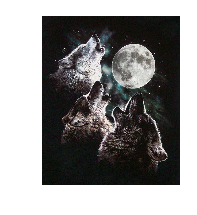

In [37]:
pylab.subplot(1,3,1); pylab.axis('off'); pylab.imshow(img)
pylab.gray()
pylab.show()

In [41]:
pylab.subplot(1,3,2); pylab.axis('off'); pylab.imshow(filtered_img[0,0,:,:])

In [42]:
pylab.subplot(1,3,3); pylab.axis('off'); pylab.imshow(filtered_img[0,1,:,:])

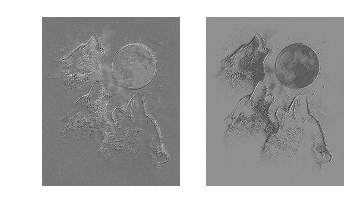

In [43]:
pylab.show()

## Max pooling

In [44]:
from theano.tensor.signal import pool

In [46]:
input=T.dtensor4('input')
maxpool_shape=(2,2)
pool_out=pool.pool_2d(input,maxpool_shape,ignore_border=True)
f=function([input],pool_out)

In [47]:
invals=np.random.RandomState(1).rand(3,2,5,5)

print 'With ignore_border set to True:'
print 'invals[0, 0, :, :] =\n', invals[0, 0, :, :]
print 'output[0, 0, :, :] =\n', f(invals)[0, 0, :, :]

With ignore_border set to True:
invals[0, 0, :, :] =
[[  4.17022005e-01   7.20324493e-01   1.14374817e-04   3.02332573e-01
    1.46755891e-01]
 [  9.23385948e-02   1.86260211e-01   3.45560727e-01   3.96767474e-01
    5.38816734e-01]
 [  4.19194514e-01   6.85219500e-01   2.04452250e-01   8.78117436e-01
    2.73875932e-02]
 [  6.70467510e-01   4.17304802e-01   5.58689828e-01   1.40386939e-01
    1.98101489e-01]
 [  8.00744569e-01   9.68261576e-01   3.13424178e-01   6.92322616e-01
    8.76389152e-01]]
output[0, 0, :, :] =
[[ 0.72032449  0.39676747]
 [ 0.6852195   0.87811744]]


In [48]:
pool_out=pool.pool_2d(input,maxpool_shape,ignore_border=False)
f=function([input],pool_out)


In [49]:
print 'With ignore_border set to False:'
print 'invals[1, 0, :, :] =\n ', invals[1, 0, :, :]
print 'output[1, 0, :, :] =\n ', f(invals)[1, 0, :, :]

With ignore_border set to False:
invals[1, 0, :, :] =
  [[ 0.01936696  0.67883553  0.21162812  0.26554666  0.49157316]
 [ 0.05336255  0.57411761  0.14672857  0.58930554  0.69975836]
 [ 0.10233443  0.41405599  0.69440016  0.41417927  0.04995346]
 [ 0.53589641  0.66379465  0.51488911  0.94459476  0.58655504]
 [ 0.90340192  0.1374747   0.13927635  0.80739129  0.39767684]]
output[1, 0, :, :] =
  [[ 0.67883553  0.58930554  0.69975836]
 [ 0.66379465  0.94459476  0.58655504]
 [ 0.90340192  0.80739129  0.39767684]]


In [51]:
class LeNetConvPoolLayer(object):
    def __init__(self,rng,input,filter_shape,image_shape,pool_size=(2,2)):
        assert image_shape[1]==filter_shape[1]
        self.input=input
        
        fan_in=np.prod(filter_shape[1:])
        fan_out=filter_shape*np.prod(filter_shape[2:])//np.prod(pool_size)
        
        W_bound=np.sqrt(6/(fan_in+fan_out))
        self.W=shared(np.asarray(rng.uniform(low=-W_bound,high=W_bound,size=filter_shape),dtype=theano.config.floatX),
                     borrow=True)
        
        b_values=np.zeros((filter_shape[0],),dtype=theano.config.floatX)
        self.b=shared(b_values,borrow=True)
        
        conv_out=conv2d(
            input=input,
            filters=self.W,
            filter_shape=filter_shape,
            input_shape=image_shape
        )
        
        pooled_out=pool.pool_2d(
            input=conv_out,
            ds=pool_size,
            ignore_border=True
        )
        
        
        self.output=T.tanh(pooled_out+b.dimshuffle('x',0,'x','x'))
        self.params=[self.W,self.b]
        self.input=input
        

In [59]:
import sys
sys.path.append('../Logistic Regression')
sys.path.append('../Multilayer perceptron')

from mlp import HiddenLayer
from logistic_sgd import LogisticRegression,load_data

def evaluate_lenet5(learning_rate=0.1, n_epochs=200,
                    dataset='../mnist.pkl.gz',
                    nkerns=[20, 50], batch_size=500):
    """ Demonstrates lenet on MNIST dataset

    :type learning_rate: float
    :param learning_rate: learning rate used (factor for the stochastic
                          gradient)

    :type n_epochs: int
    :param n_epochs: maximal number of epochs to run the optimizer

    :type dataset: string
    :param dataset: path to the dataset used for training /testing (MNIST here)

    :type nkerns: list of ints
    :param nkerns: number of kernels on each layer
    """

    rng = np.random.RandomState(23455)

    datasets = load_data(dataset)

    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]

    # compute number of minibatches for training, validation and testing
    n_train_batches = train_set_x.get_value(borrow=True).shape[0]
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0]
    n_test_batches = test_set_x.get_value(borrow=True).shape[0]
    n_train_batches //= batch_size
    n_valid_batches //= batch_size
    n_test_batches //= batch_size

    # allocate symbolic variables for the data
    index = T.lscalar()  # index to a [mini]batch

    # start-snippet-1
    x = T.matrix('x')   # the data is presented as rasterized images
    y = T.ivector('y')  # the labels are presented as 1D vector of
                        # [int] labels

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    print('... building the model')

    # Reshape matrix of rasterized images of shape (batch_size, 28 * 28)
    # to a 4D tensor, compatible with our LeNetConvPoolLayer
    # (28, 28) is the size of MNIST images.
    layer0_input = x.reshape((batch_size, 1, 28, 28))

    # Construct the first convolutional pooling layer:
    # filtering reduces the image size to (28-5+1 , 28-5+1) = (24, 24)
    # maxpooling reduces this further to (24/2, 24/2) = (12, 12)
    # 4D output tensor is thus of shape (batch_size, nkerns[0], 12, 12)
    layer0 = LeNetConvPoolLayer(
        rng,
        input=layer0_input,
        image_shape=(batch_size, 1, 28, 28),
        filter_shape=(nkerns[0], 1, 5, 5),
        poolsize=(2, 2)
    )

    # Construct the second convolutional pooling layer
    # filtering reduces the image size to (12-5+1, 12-5+1) = (8, 8)
    # maxpooling reduces this further to (8/2, 8/2) = (4, 4)
    # 4D output tensor is thus of shape (batch_size, nkerns[1], 4, 4)
    layer1 = LeNetConvPoolLayer(
        rng,
        input=layer0.output,
        image_shape=(batch_size, nkerns[0], 12, 12),
        filter_shape=(nkerns[1], nkerns[0], 5, 5),
        poolsize=(2, 2)
    )

    # the HiddenLayer being fully-connected, it operates on 2D matrices of
    # shape (batch_size, num_pixels) (i.e matrix of rasterized images).
    # This will generate a matrix of shape (batch_size, nkerns[1] * 4 * 4),
    # or (500, 50 * 4 * 4) = (500, 800) with the default values.
    layer2_input = layer1.output.flatten(2)

    # construct a fully-connected sigmoidal layer
    layer2 = HiddenLayer(
        rng,
        input=layer2_input,
        n_in=nkerns[1] * 4 * 4,
        n_out=500,
        activation=T.tanh
    )

    # classify the values of the fully-connected sigmoidal layer
    layer3 = LogisticRegression(input=layer2.output, n_in=500, n_out=10)

    # the cost we minimize during training is the NLL of the model
    cost = layer3.negative_log_likelihood(y)

    # create a function to compute the mistakes that are made by the model
    test_model = theano.function(
        [index],
        layer3.errors(y),
        givens={
            x: test_set_x[index * batch_size: (index + 1) * batch_size],
            y: test_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        [index],
        layer3.errors(y),
        givens={
            x: valid_set_x[index * batch_size: (index + 1) * batch_size],
            y: valid_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )

    # create a list of all model parameters to be fit by gradient descent
    params = layer3.params + layer2.params + layer1.params + layer0.params

    # create a list of gradients for all model parameters
    grads = T.grad(cost, params)

    # train_model is a function that updates the model parameters by
    # SGD Since this model has many parameters, it would be tedious to
    # manually create an update rule for each model parameter. We thus
    # create the updates list by automatically looping over all
    # (params[i], grads[i]) pairs.
    updates = [
        (param_i, param_i - learning_rate * grad_i)
        for param_i, grad_i in zip(params, grads)
    ]

    train_model = theano.function(
        [index],
        cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )
    # end-snippet-1

    ###############
    # TRAIN MODEL #
    ###############
    print('... training')
    # early-stopping parameters
    patience = 10000  # look as this many examples regardless
    patience_increase = 2  # wait this much longer when a new best is
                           # found
    improvement_threshold = 0.995  # a relative improvement of this much is
                                   # considered significant
    validation_frequency = min(n_train_batches, patience // 2)
                                  # go through this many
                                  # minibatche before checking the network
                                  # on the validation set; in this case we
                                  # check every epoch

    best_validation_loss = np.inf
    best_iter = 0
    test_score = 0.
    start_time = timeit.default_timer()

    epoch = 0
    done_looping = False

    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in range(n_train_batches):

            iter = (epoch - 1) * n_train_batches + minibatch_index

            if iter % 100 == 0:
                print('training @ iter = ', iter)
            cost_ij = train_model(minibatch_index)

            if (iter + 1) % validation_frequency == 0:

                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in range(n_valid_batches)]
                this_validation_loss = np.mean(validation_losses)
                print('epoch %i, minibatch %i/%i, validation error %f %%' %
                      (epoch, minibatch_index + 1, n_train_batches,
                       this_validation_loss * 100.))

                # if we got the best validation score until now
                if this_validation_loss < best_validation_loss:

                    #improve patience if loss improvement is good enough
                    if this_validation_loss < best_validation_loss *  \
                       improvement_threshold:
                        patience = max(patience, iter * patience_increase)

                    # save best validation score and iteration number
                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    # test it on the test set
                    test_losses = [
                        test_model(i)
                        for i in range(n_test_batches)
                    ]
                    test_score = np.mean(test_losses)
                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))

            if patience <= iter:
                done_looping = True
                break

    end_time = timeit.default_timer()
    print('Optimization complete.')
    print('Best validation score of %f %% obtained at iteration %i, '
          'with test performance %f %%' %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))
    

if __name__ == '__main__':
    evaluate_lenet5()


def experiment(state, channel):
    evaluate_lenet5(state.learning_rate, dataset=state.dataset)

... loading data
... building the model


TypeError: __init__() got an unexpected keyword argument 'poolsize'